# 010.Simple Linear Regression

## Univariate Linear Regression (단변수 선형회귀)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
# Load the diabetes dataset
# 나이, 성별, 체질량지수, 혈압, 6가지 혈청 수치  --> already scaled
diabetes = datasets.load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
diabetes.data.shape

(442, 10)

In [4]:
diabetes.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [5]:
#1년 뒤 측정한 당뇨병의 진행률 - target(label)
diabetes.target[:5]

array([151.,  75., 141., 206., 135.])

In [6]:
df_diab  = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [7]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## univariate linear regression data 생성

In [8]:
# Use only one feature (단변수 선형회귀)

diabetes_X = df_diab['bmi'].values.reshape(-1, 1)

In [9]:
# training/testing data set 분할

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [10]:
# targets data 를 training/testing set 으로 분리

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## sklearn model 이용

In [11]:
# regression object 생성

regr = linear_model.LinearRegression()

In [12]:
from sklearn import set_config

set_config(print_changed_only=False)

In [13]:
# training set 을 이용하여 model 훈련

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [14]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616113


In [15]:
print(regr.predict(np.array([[-0.050]])))
print(regr.predict(np.array([[0.025]])))

[106.00696876]
[176.37480836]


In [16]:
y_pred = regr.predict(diabetes_X_test)

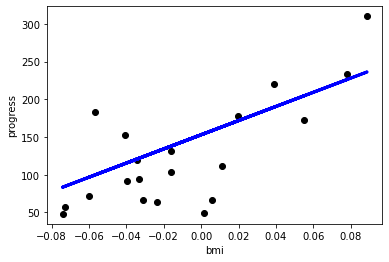

In [17]:
# visualization

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('bmi') 
plt.ylabel('progress')
plt.show()

## R2 계산

In [18]:
print("결정계수 : {:.2f}".format(r2_score(diabetes_y_test, y_pred)))

결정계수 : 0.47


## Multivariate Linear Regression (다변수 선형회귀)

bmi, bp 두가지 변수를 이용한 Linear Regression

In [19]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
# 2 개의 feature 를 사용
diabetes_X = df_diab.values

In [21]:
diabetes_X.shape

(442, 10)

In [22]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [23]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [25]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [26]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [27]:
# R2 계산 
print("결정계수: {:.2f}".format(r2_score(diabetes_y_test, diabetes_y_pred)))

결정계수: 0.59
